In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

In [2]:
games = pd.read_csv('data/boardgame.csv', sep=';', error_bad_lines=False)
games.head()

b'Skipping line 26487: expected 27 fields, saw 28\nSkipping line 32475: expected 27 fields, saw 28\n'
b'Skipping line 33073: expected 27 fields, saw 28\nSkipping line 35357: expected 27 fields, saw 28\nSkipping line 45346: expected 27 fields, saw 28\nSkipping line 47638: expected 27 fields, saw 28\nSkipping line 47724: expected 27 fields, saw 28\nSkipping line 50148: expected 27 fields, saw 28\nSkipping line 53728: expected 27 fields, saw 28\nSkipping line 56608: expected 27 fields, saw 28\n'


,id,name,year_published,min_players,max_players,playingtime,min_age,users_rated,average_rating,rating_stddev,...,num_players_notrec,suggested_age,categories,mechanics,boardgamefamilies,implementation_of,designers,artists,publishers,Unnamed: 26
0,1,Die Macher,1986,3,5,240,14,3973,771006,156772,...,"1:71,2:71,3:62,4:10,5:2,-1:50","2:0,3:0,4:0,5:0,6:0,8:0,10:0,12:5,14:13,16:4,1...","1017,1021,1026,1001","2080,2012,2072,2040","10643,91",NaN,1,12517,"133,2,5382",NaN
1,2,Dragonmaster,1981,3,4,30,12,405,660742,145377,...,"1:2,2:2,3:1,4:0,-1:2","2:0,3:0,4:0,5:0,6:0,8:0,10:0,12:0,14:0,16:0,18...","1002,1010",2009,7005,2174,8384,12424,"64,20",NaN
2,3,Samurai,1998,2,4,45,10,9847,74486,119943,...,"1:94,2:9,3:2,4:20,-1:79","2:0,3:0,4:0,5:0,6:4,8:9,10:18,12:2,14:0,16:0,1...",1035,"2080,2040,2004,2002","9470,10634,42",NaN,2,11883,"267,29,7340,7335,41,133,1391,5812,3218,3,3954,...",NaN
3,4,Tal der Könige,1992,2,4,60,12,286,664937,119351,...,"1:4,2:2,3:0,4:0,-1:3","2:0,3:0,4:0,5:0,6:0,8:0,10:0,12:0,14:1,16:0,18...",1050,"2001,2080,2012,2004","6471,11505",NaN,8008,NaN,37,NaN
4,5,Acquire,1962,3,6,90,12,12031,739447,132372,...,"1:128,2:129,3:33,4:1,5:21,6:66,-1:108","2:0,3:0,4:0,5:0,6:0,8:4,10:17,12:20,14:8,16:1,...",1021,"2040,2005,2002",4891,NaN,4,12658,"92,5,4871,3082,858,2962,5392,4668,38,4622,7107",NaN


In [3]:
games.columns

Index(['id', 'name', 'year_published', 'min_players', 'max_players',
       'playingtime', 'min_age', 'users_rated', 'average_rating',
       'rating_stddev', 'num_owned', 'num_trading', 'num_wanting',
       'num_wishing', 'num_comments', 'num_players_best', 'num_players_rec',
       'num_players_notrec', 'suggested_age', 'categories', 'mechanics',
       'boardgamefamilies', 'implementation_of', 'designers', 'artists',
       'publishers', 'Unnamed: 26'],
      dtype='object')

Eliminate some extraneous columns

In [4]:
to_drop = ['id', 'num_players_best', 'num_comments', 'num_players_rec', 'num_players_notrec', 'suggested_age', 
           'num_owned', 'num_wishing', 'num_wanting', 'categories', 'implementation_of', 'artists',
           'publishers', 'mechanics', 'num_trading', 'designers', 'Unnamed: 26']
games = games.drop(to_drop, axis=1)

In [5]:
games.head(10)

,name,year_published,min_players,max_players,playingtime,min_age,users_rated,average_rating,rating_stddev,boardgamefamilies
0,Die Macher,1986,3,5,240,14,3973,771006,156772,"10643,91"
1,Dragonmaster,1981,3,4,30,12,405,660742,145377,7005
2,Samurai,1998,2,4,45,10,9847,74486,119943,"9470,10634,42"
3,Tal der Könige,1992,2,4,60,12,286,664937,119351,"6471,11505"
4,Acquire,1962,3,6,90,12,12031,739447,132372,4891
5,Mare Mediterraneum,1989,2,6,240,12,64,654219,169317,NaN
6,Cathedral,1978,2,2,20,8,2232,654924,128609,24571
7,Lords of Creation,1993,2,5,120,12,163,613344,123582,NaN
8,El Caballero,1998,2,4,90,13,1088,658139,142547,9959
9,Elfenland,1998,2,6,60,10,5523,677361,124621,19299


In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61803 entries, 0 to 61802
Data columns (total 10 columns):
name                 61803 non-null object
year_published       61803 non-null int64
min_players          61803 non-null int64
max_players          61803 non-null int64
playingtime          61803 non-null int64
min_age              61803 non-null int64
users_rated          61803 non-null int64
average_rating       61803 non-null int64
rating_stddev        61803 non-null int64
boardgamefamilies    30328 non-null object
dtypes: int64(8), object(2)
memory usage: 4.7+ MB


In [7]:
def round(x):
    scale = 10**np.floor(np.log10(x))
    return x/scale

round(771006.000000)

7.71006

In [8]:
games['average_rating'] = games['average_rating'].apply(round)
games['rating_stddev'] = games['rating_stddev'].apply(round)

games = games.dropna(subset=['average_rating'])

In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40889 entries, 0 to 61802
Data columns (total 10 columns):
name                 40889 non-null object
year_published       40889 non-null int64
min_players          40889 non-null int64
max_players          40889 non-null int64
playingtime          40889 non-null int64
min_age              40889 non-null int64
users_rated          40889 non-null int64
average_rating       40889 non-null float64
rating_stddev        30480 non-null float64
boardgamefamilies    21702 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 3.4+ MB


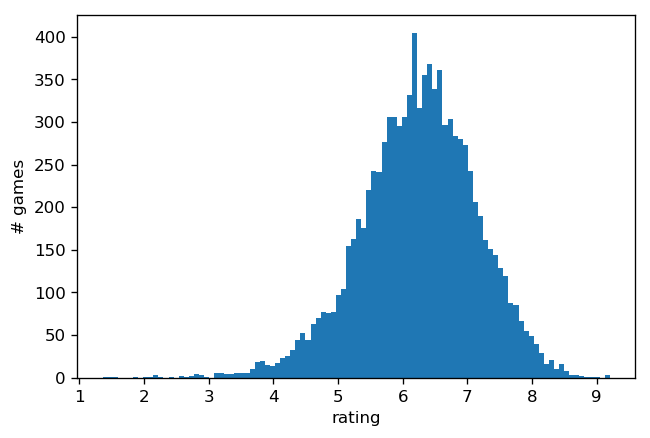

In [10]:
MIN_USERS_TO_COUNT = 30
mask_enough_ratings = (games['users_rated'] > MIN_USERS_TO_COUNT)

plt.figure(dpi=120)
plt.hist(games.loc[mask_enough_ratings, 'average_rating'], bins=100)
plt.xlabel('rating')
plt.ylabel('# games');

In [11]:
moment_subset = games.loc[mask_enough_ratings, 'average_rating']
pop_mean = moment_subset.mean()
pop_var = moment_subset.var()

pop_mean, pop_var

(6.243212717004798, 0.8095482920570869)

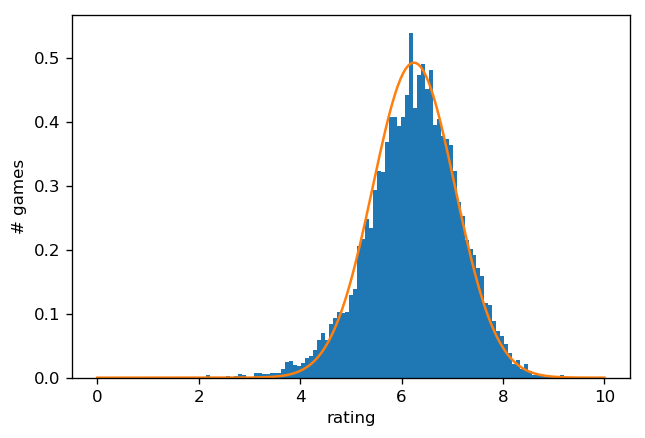

In [12]:
MIN_USERS_TO_COUNT = 30
mask_enough_ratings = (games['users_rated'] > MIN_USERS_TO_COUNT)

X = np.linspace(0, 10, 200)

plt.figure(dpi=120)
plt.hist(games.loc[mask_enough_ratings, 'average_rating'], bins=100, normed=True)
plt.plot(X, norm.pdf(X, pop_mean, pop_var))
plt.xlabel('rating')
plt.ylabel('# games');

In [13]:
pd.to_pickle(games, 'data/boardgame_clean.pkl')